# Iris Classification

In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

dataset = pandas.read_csv('iris.data',sep='\t')

dataset.head(10) #print first 10 rows of dataset


,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [2]:
dataset.tail(10) #print last 10 rows of dataset

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
dataset.describe() #print statistical summary of dataset

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
dataset.sample(5) #print 5 random rows from dataset 

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
35,5.0,3.2,1.2,0.2,Iris-setosa
134,6.1,2.6,5.6,1.4,Iris-virginica
53,5.5,2.3,4.0,1.3,Iris-versicolor
14,5.8,4.0,1.2,0.2,Iris-setosa
132,6.4,2.8,5.6,2.2,Iris-virginica


In [5]:
dataset.isnull().sum() #check number of null entires in dataset

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

# Data Visualisation

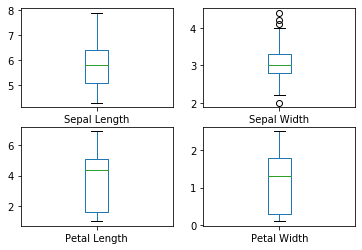

In [6]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

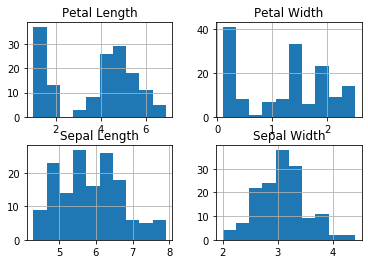

In [7]:
# histograms
dataset.hist()
plt.show()

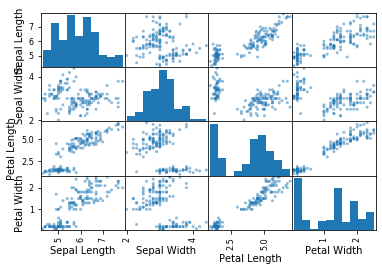

In [8]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

# Data Manipulation

In [9]:
# Split validation dataset (80-20)
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Data Evaluation

In [10]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

#Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DECISION TREE CLASSIFIER', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Evaluate each model 
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
#  print(name)   
#  print(cv_results, sep = "\n")


KNN: 0.983333 (0.033333)
LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
DECISION TREE CLASSIFIER: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


# Prediction

In [11]:
#Although SVM has the highest accuracy, and thus should be used to make predictions,
# I wanted to make predication with all the models.
for name,model in models:
    mod = model
    mod.fit(X_train, Y_train)
    predictions = mod.predict(X_validation)
    print("MODEL: \t",name);
    print("accuracy: ",accuracy_score(Y_validation, predictions))
    print("confusion matrix: \n",confusion_matrix(Y_validation, predictions))
    print("classification report: \n",classification_report(Y_validation, predictions))
        

MODEL: 	 KNN
accuracy:  0.9
confusion matrix: 
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

MODEL: 	 LR
accuracy:  0.8
confusion matrix: 
 [[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]
classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

       accuracy                           0.80        30
      macro avg       0.85      0.83      0.82        30
   weighted avg       0.83      0.8

# Conclusion

In [12]:
#LDA and SVM had close to the highest accuracies and hence were the best prediction models for the given dataset
#This was my intro project to data science.